<a href="https://colab.research.google.com/github/jmacedo91/Exploratory-Data-Analysis/blob/main/002%20-%20Wine%20Quality%20EDA%20and%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🍷 Wine Quality Dataset 🍇

<img src="https://media.gazetadopovo.com.br/2022/09/17190351/capa_shutterstock_734587048-960x540.jpg">

**Description:**
This datasets is related to red variants of the Portuguese "Vinho Verde" wine.The dataset describes the amount of various chemicals present in wine and their effect on it's quality. The datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).Your task is to predict the quality of wine using the given data.

A simple yet challenging project, to anticipate the quality of wine.
The complexity arises due to the fact that the dataset has fewer samples, & is highly imbalanced.
Can you overcome these obstacles & build a good predictive model to classify them?

This data frame contains the following columns:

Input variables (based on physicochemical tests):\
1 - fixed acidity\
2 - volatile acidity\
3 - citric acid\
4 - residual sugar\
5 - chlorides\
6 - free sulfur dioxide\
7 - total sulfur dioxide\
8 - density\
9 - pH\
10 - sulphates\
11 - alcohol\
Output variable (based on sensory data):\
12 - quality (score between 0 and 10)

Acknowledgements:
This dataset is also available from Kaggle & UCI machine learning repository, https://archive.ics.uci.edu/ml/datasets/wine+quality.

Objective:
- Understand the Dataset & cleanup (if required).
- Build classification models to predict the wine quality.
- Also fine-tune the hyperparameters & compare the evaluation metrics of various classification algorithms.

#1. Importando as Bibliotecas

In [1]:
# Data Analysis
import pandas as pd
import numpy as np

# Data Visualization
import seaborn as sns
sns.set_theme(style='darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

##1.1 Conhecendo os dados

In [2]:
# df = pd.read_csv('Datasets/WineQT.csv') # Jupyter
df = pd.read_csv('WineQT.csv') # Colab

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


#2. Análise Exploratória dos Dados

## 2.1 Visualizando a distribuição dos dados

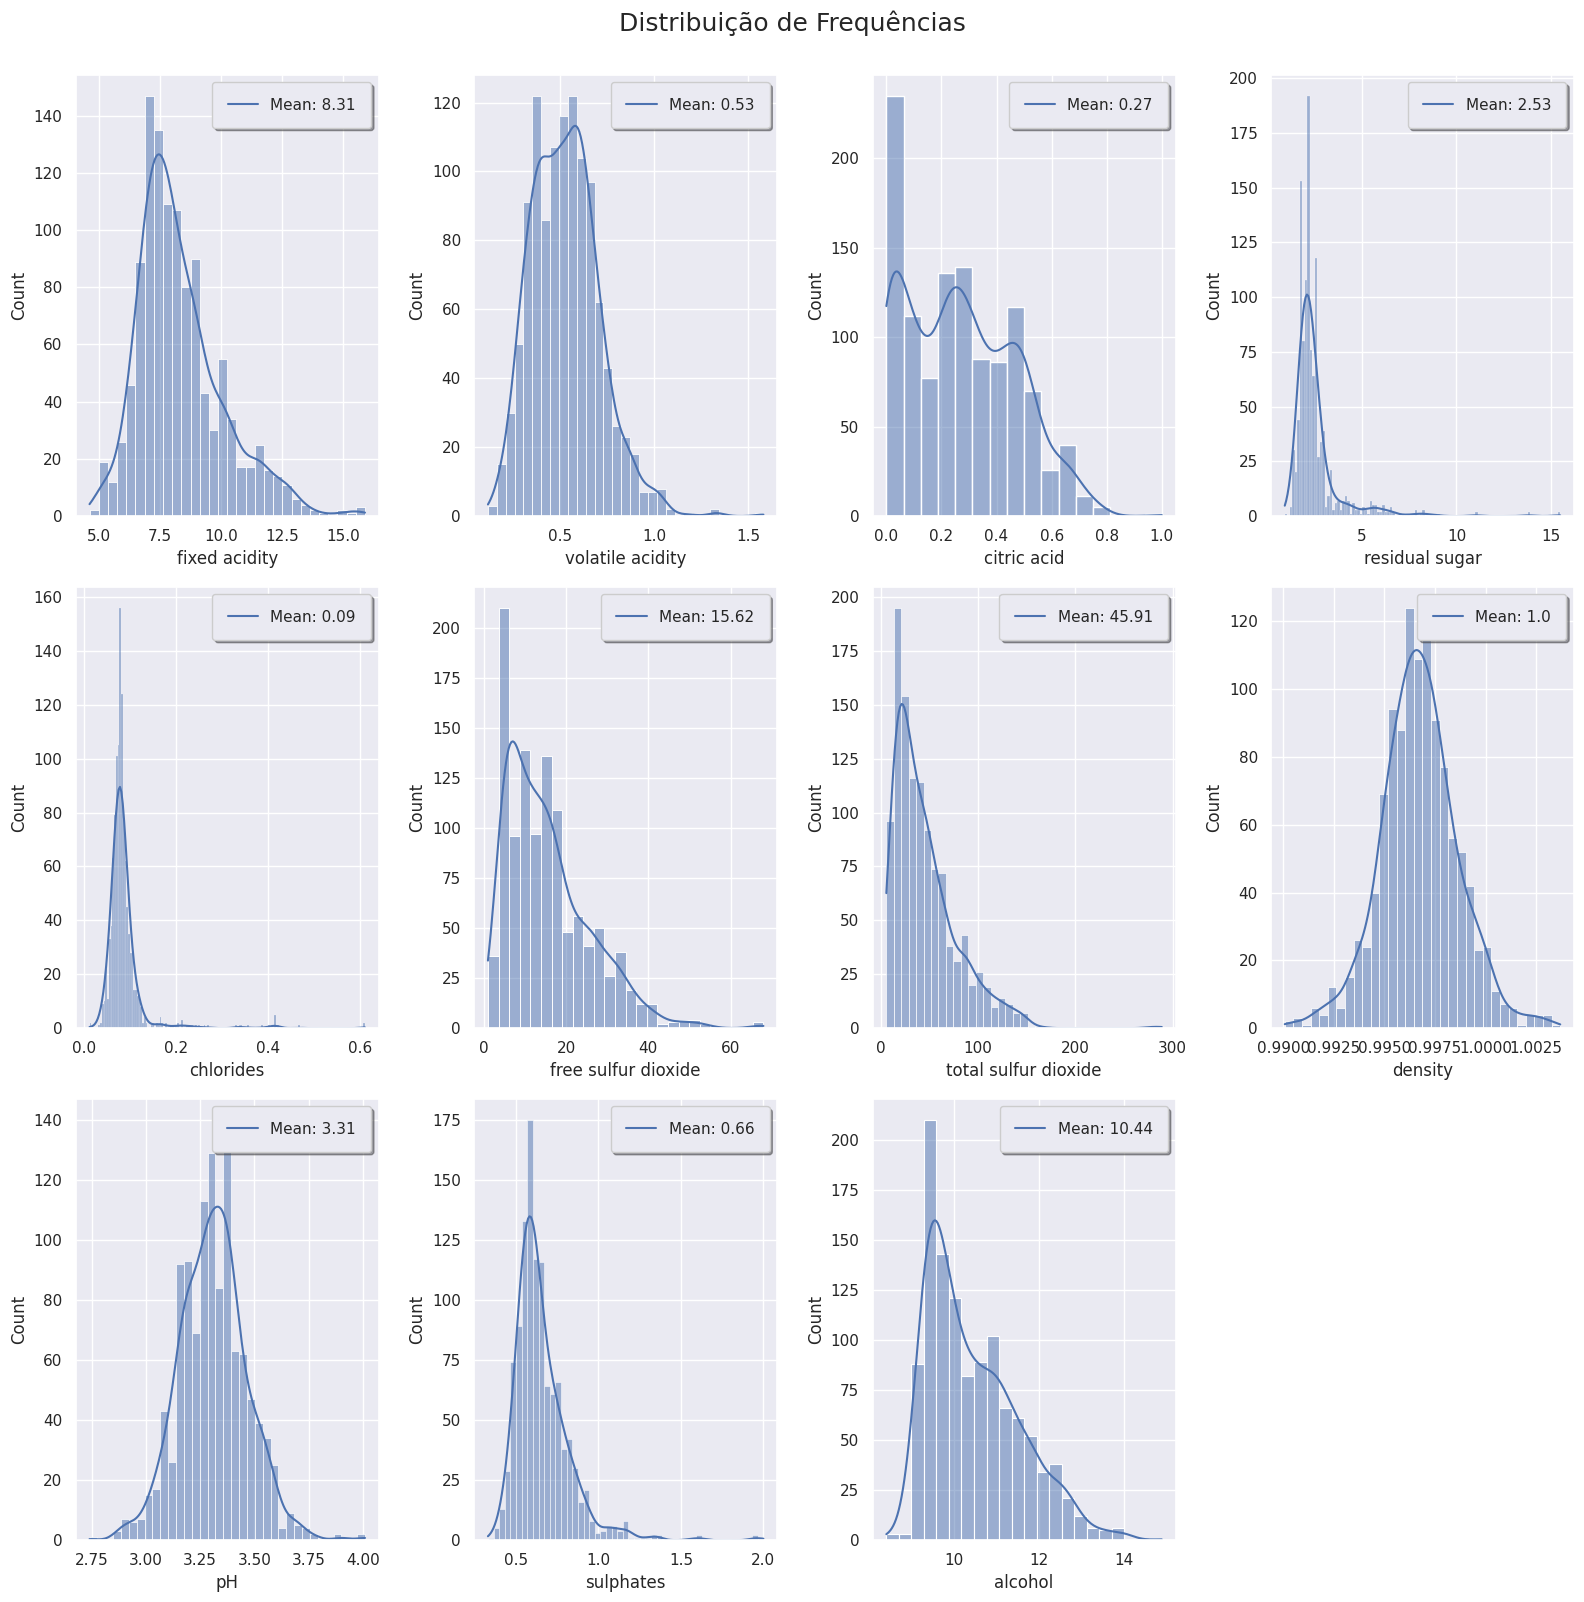

In [6]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 16), dpi=100)

fig.suptitle('Distribuição de Frequências', y=1, fontsize=18)

for i in range(3):
  for j in range(4):
    sns.histplot(ax=axes[i, j], data=df[df.columns[(i * 3) + i + j]], kde=True)
    feat_mean = round(df[df.columns[(i * 3) + i + j]].describe()[1], 2)
    axes[i][j].legend([f'Mean: {feat_mean}'],
                      fancybox=True,
                      shadow=True,
                      borderpad=1)

fig.tight_layout()
fig.delaxes(axes[2, -1])
plt.show()

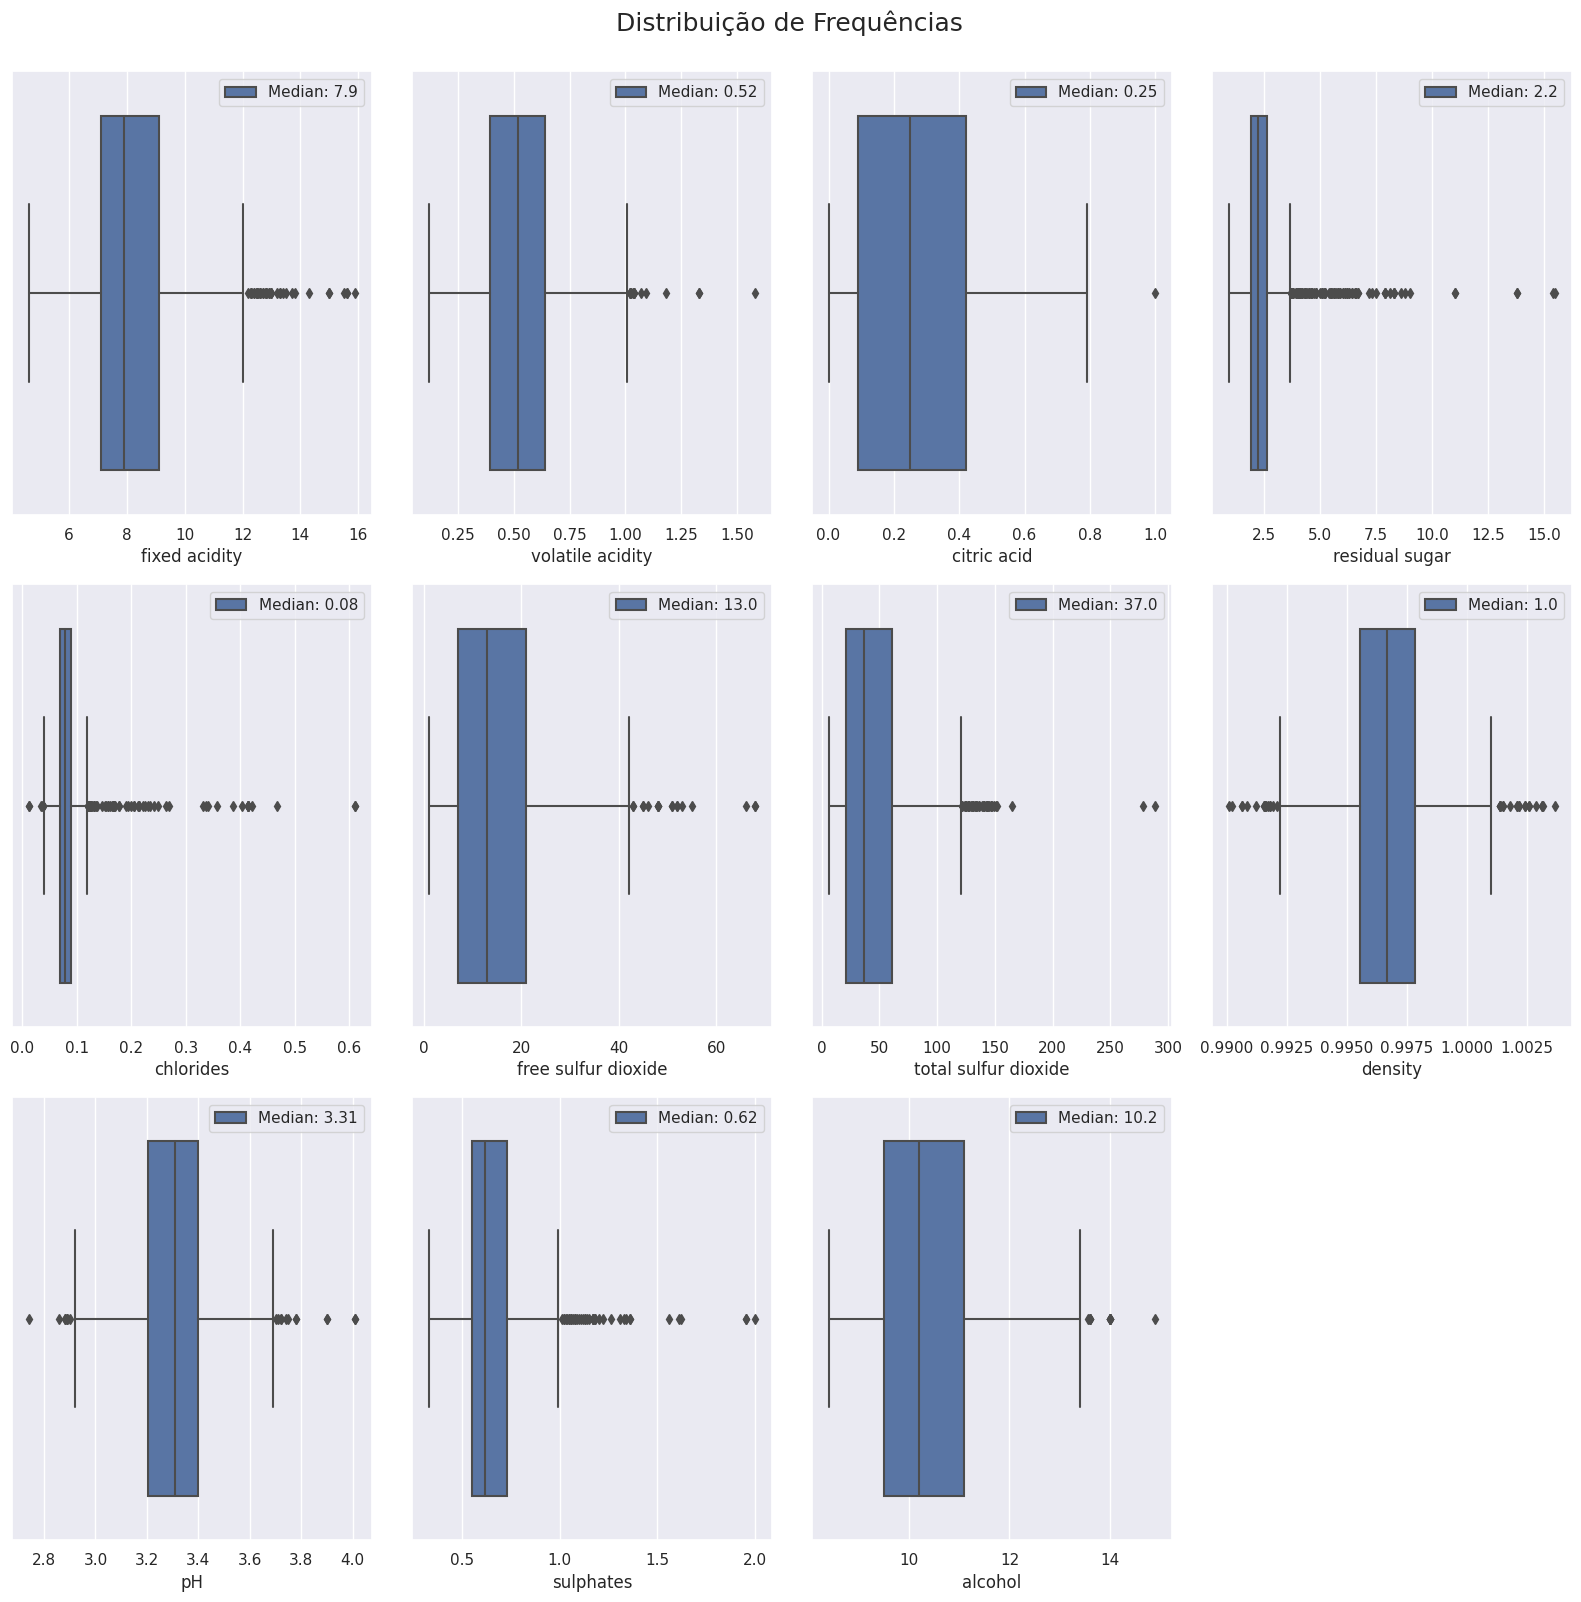

In [7]:
fig, axes = plt.subplots(3, 4, figsize=(16, 16), dpi=100)

fig.suptitle('Distribuição de Frequências', y=1, fontsize=18)

for i in range(3):
  for j in range(4):
    sns.boxplot(ax=axes[i, j], data=df, x=df[df.columns[(i * 3) + i + j]])
    feat_median = str(round(df[df.columns[(i * 3) + i + j]].describe()[5], 2))
    axes[i][j].legend(['Median: ' + feat_median])

fig.tight_layout()
fig.delaxes(axes[2, -1])
plt.show()

## 2.2 Analisando os Parâmetros Físico Químicos

### 2.2.1 Acidez Fixa

A acidez fixa do vinho é um dos componentes importantes que contribuem para as características sensoriais e químicas da bebida. Refere-se à quantidade de ácidos presentes no vinho que não são voláteis, ou seja, que não evaporam facilmente, como exemplo, podemos citar o ácido tartárico, málico e cítrico, provenientes da uva, e lático e succínico, provenientes da fermentação (AQUARONE et. al, 2001).

In [8]:
df['fixed acidity'].describe()

count    1143.000000
mean        8.311111
std         1.747595
min         4.600000
25%         7.100000
50%         7.900000
75%         9.100000
max        15.900000
Name: fixed acidity, dtype: float64

In [9]:
def distribuicao(titulo, parametro):
  fig, axes = plt.subplots(1, 2, figsize=(10, 5), dpi=100)

  fig.suptitle(titulo, y=1, fontsize=14)

  feat_mean = round(df[parametro].describe().loc['mean'], 3)
  feat_std = round(df[parametro].describe().loc['std'], 3)
  feat_25 = round(df[parametro].describe().loc['25%'], 3)
  feat_50 = round(df[parametro].describe().loc['50%'], 3)
  feat_75 = round(df[parametro].describe().loc['75%'], 3)

  sns.histplot(ax=axes[0], data=df[parametro], kde=True)
  axes[0].set_title('Histograma')
  axes[0].set_xlabel(parametro.title())
  axes[0].annotate(f"μ: {feat_mean}", xy=(0.81, 0.945), xycoords='axes fraction',
              fontsize=12)
  axes[0].annotate(f"σ: {feat_std}", xy=(0.81, 0.89), xycoords='axes fraction',
              fontsize=12)

  sns.boxplot(ax=axes[1], data=df[parametro], orient="h")
  axes[1].set_title('Boxplot')
  axes[1].set_xlabel(parametro.title())
  axes[1].annotate(f"25%: {feat_25}", xy=(0.75, 0.945), xycoords='axes fraction',
              fontsize=12)
  axes[1].annotate(f"50%: {feat_50}", xy=(0.75, 0.89), xycoords='axes fraction',
              fontsize=12)
  axes[1].annotate(f"75%: {feat_75}", xy=(0.75, 0.835), xycoords='axes fraction',
              fontsize=12)

  fig.tight_layout()
  plt.show()

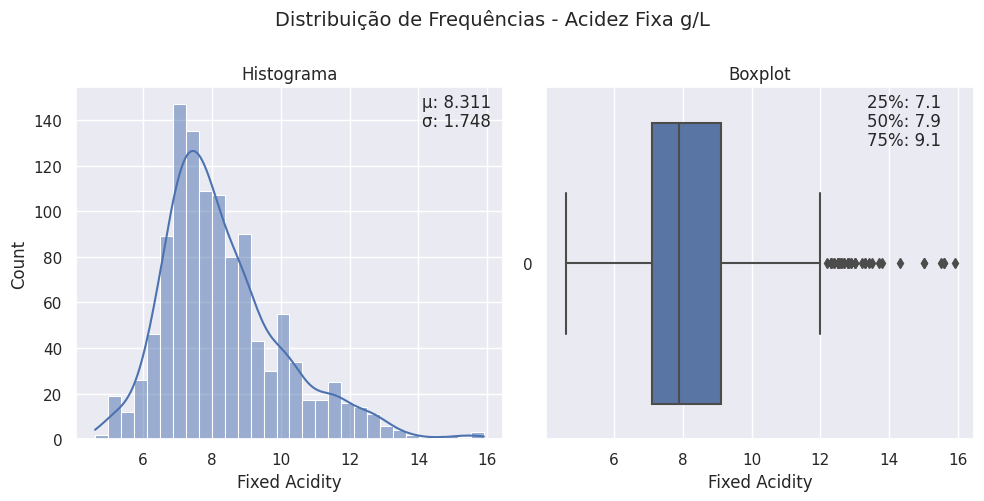

In [10]:
distribuicao('Distribuição de Frequências - Acidez Fixa g/L', 'fixed acidity')

In [11]:
df_quality_mean = df.groupby(by="quality").mean()
df_quality_mean["fixed acidity"]

quality
3    8.450000
4    7.809091
5    8.161077
6    8.317749
7    8.851049
8    8.806250
Name: fixed acidity, dtype: float64

In [12]:
df_quality_std = df.groupby(by="quality").std()
df_quality_std["fixed acidity"]

quality
3    2.032486
4    1.685668
5    1.557746
6    1.771585
7    2.105187
8    2.089168
Name: fixed acidity, dtype: float64

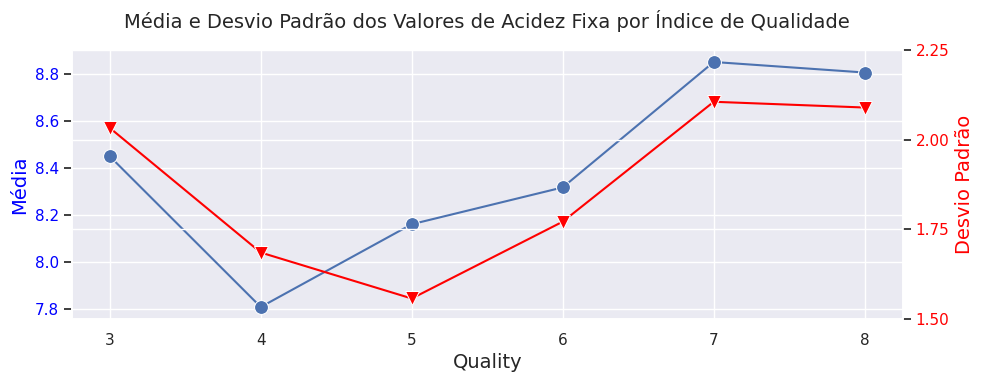

In [13]:
ax1 = sns.lineplot(data=df_quality_mean,
                   x=df_quality_mean["fixed acidity"].index,
                   y=df_quality_mean["fixed acidity"], marker="o",
                   markersize=10)
ax1.figure.set_size_inches(10, 4)
ax1.set_title("Média e Desvio Padrão dos Valores de Acidez Fixa por Índice de Qualidade",
              fontsize=14, y=1.05)
ax1.set_xlabel("Quality", fontsize=14)
ax1.set_ylabel("Média", fontsize=14, color="blue")
for label in ax1.get_yticklabels():
  label.set_color("blue")

ax2 = ax1.twinx()
ax2 = sns.lineplot(data=df_quality_std,
                  x=df_quality_std["fixed acidity"].index,
                  y=df_quality_std["fixed acidity"],
                  color="red", marker="v", markersize=10)
ax2.set_ylabel("Desvio Padrão", fontsize=14, color="red")
ax2.set_yticks(np.arange(1.5, 2.5, step=0.25))
for label in ax2.get_yticklabels():
  label.set_color("red")
plt.tight_layout()
plt.show()

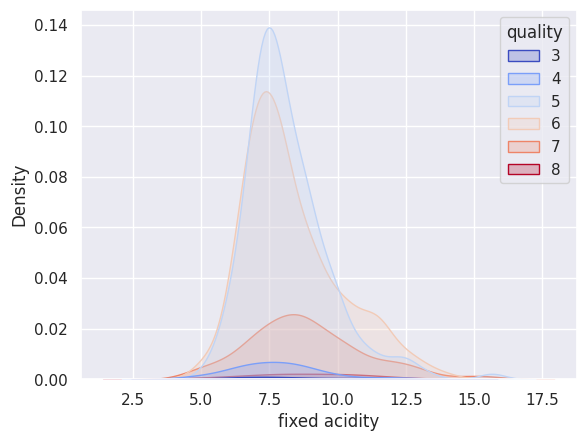

In [ ]:
sns.kdeplot(data=df, x='fixed acidity', hue='quality', fill=True, palette='coolwarm')
plt.show()

É possível notar que os valores de acidez fixa apresentaram grande dispersão quando avaliados em relação à sua qualidade. Analisando o coeficiente de Pearson obtido a partir das duas variáveis obtemos um valor que reflete uma correlação muito fraca.

In [18]:
df[['quality', 'fixed acidity']].corr()

,quality,fixed acidity
quality,1.00000,0.12197
fixed acidity,0.12197,1.00000


### 2.2.2 Acidez Volátil e Dióxido de Enxofre

Elevadas quantidades de acidez volátil são um sinal de mudanças microbiológicas, resultantes da condição insatisfatória das uvas, falta de higienização dos recipientes e outros procedimentos inadequados durante o processo de vinificação e armazenamento do vinho. Vinhos produzidos de forma adequada, nos quais foram adicionadas proporções adequadas de dióxido de enxofre, costumam exibir uma acidez volátil reduzida. (LEDO, 2019)

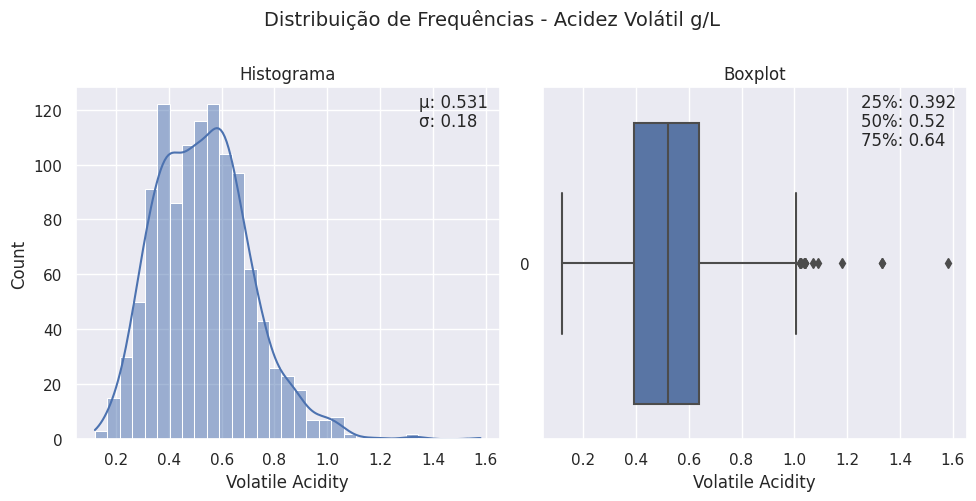

In [19]:
distribuicao('Distribuição de Frequências - Acidez Volátil g/L', 'volatile acidity')

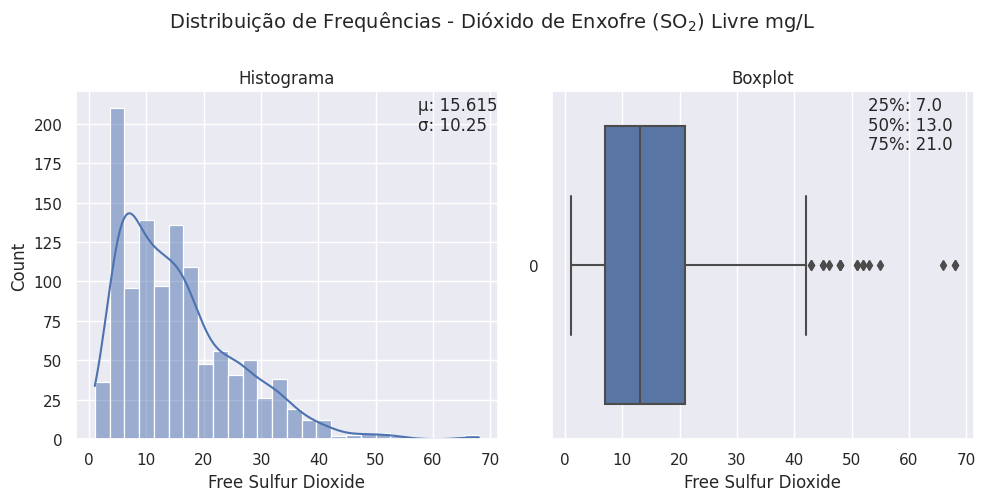

In [23]:
distribuicao('Distribuição de Frequências - Dióxido de Enxofre (SO$_2$) Livre mg/L', 'free sulfur dioxide')

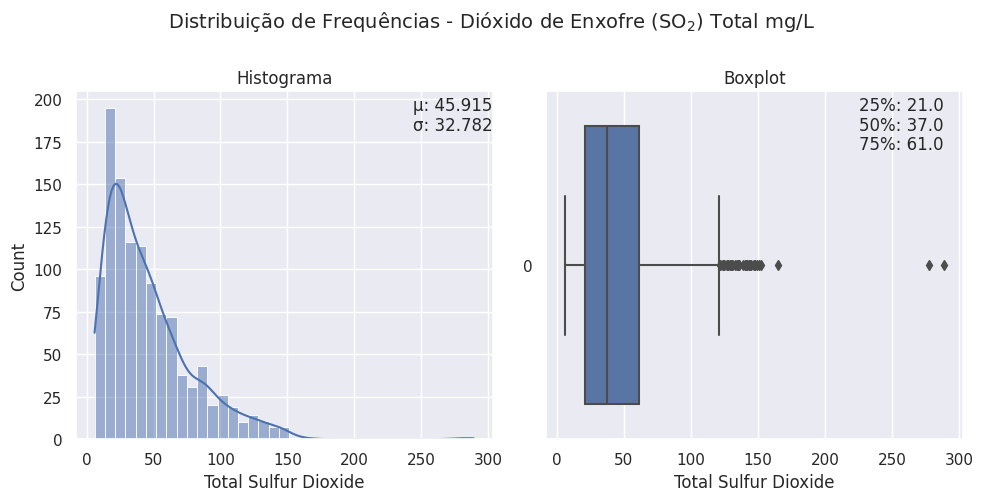

In [25]:
distribuicao('Distribuição de Frequências - Dióxido de Enxofre (SO$_2$) Total mg/L', 'total sulfur dioxide')

A acidez volátil apresentou uma distribuição aproximadamente normal para os vinhos analisados.

As distribuições do Dióxido de Enxofre (Total e Livre) apresentaram uma assimetria à esquerda, as medianas apresentaram valores menores que a média dos conjuntos analisados, confirmando o comportamento das distribuições.

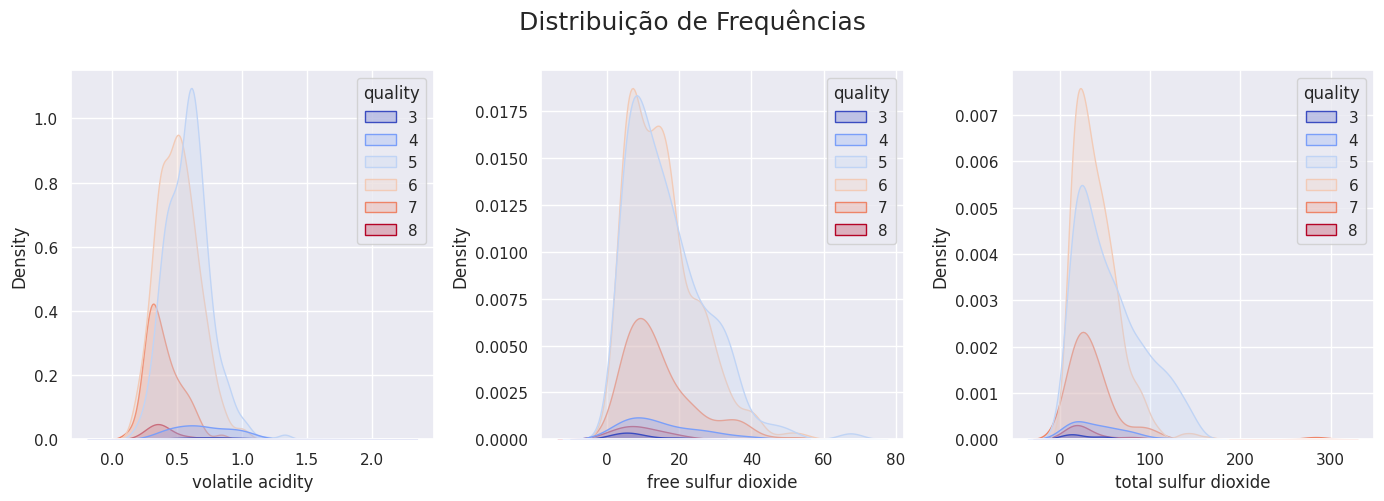

In [42]:
fig, axes = plt.subplots(ncols=3, figsize=(14, 5), dpi=100)

fig.suptitle('Distribuição de Frequências', y=1, fontsize=18)

dados = df[['volatile acidity', 'free sulfur dioxide', 'total sulfur dioxide', 'quality']]
for i in range(3):
  sns.kdeplot(ax=axes[i], data=dados, x=dados.columns[i], hue='quality', fill=True, palette='coolwarm')

fig.tight_layout()
plt.show()

No gráfico acima é interessante notar que a dispersão dos dados para o vinho de qualidade de maior nota (8) não é tão acentuada como na variável de acidez fixa.

In [43]:
dados.corr()

,volatile acidity,free sulfur dioxide,total sulfur dioxide,quality
volatile acidity,1.000000,-0.001962,0.077748,-0.407394
free sulfur dioxide,-0.001962,1.000000,0.661093,-0.063260
total sulfur dioxide,0.077748,0.661093,1.000000,-0.183339
quality,-0.407394,-0.063260,-0.183339,1.000000


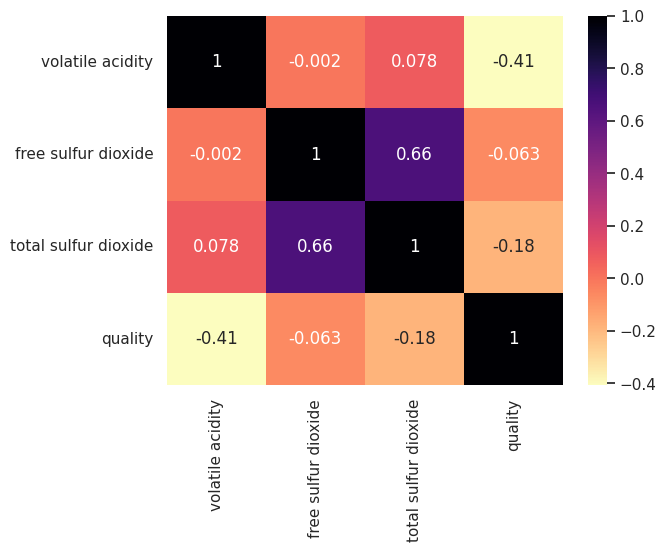

In [47]:
sns.heatmap(dados.corr(), annot=True, cmap='magma_r')
plt.show()

Alguns pontos merecem destaque na matriz de correlação.

- A acidez volátil demonstrou uma correlação inversamente proporcional com a qualidade dos vinhos, corroborando as informações obtidas na literatura.

- Os valores de Dióxido de Enxofre Total e Livre se correlacionam conforme esperado

- O teor de acidez volátil não apresentou correlação com os níveis de Dióxido de Enxofre nos vinho, enfraquecendo a tese que esses compostos contribuem para a a diminuição da acidez volátil no vinho.

<h1>Referências</h1>

AQUARONE, E; BORZANI, W; SCHIMIDELL, W; LIMA, U. A. Biotecnologia
industrial. 5 ed. São Paulo: Editora Edgard Blucher Ltda, 2001. 523p.

LEDO, Luan Victor Rodrigues. Perfil Químico e Volátil de Vinhos Espumantes Secos e Meio Doces do Vale do São Francisco. Universidade Federal de Sergipe. São Cristovão - SE, 2019.